In [3]:
%pylab inline
import pandas as pd
import seaborn as sns
data = pd.DataFrame.from_csv('./mode-report-run-5bbb05c4cff9.csv', index_col=None)

Populating the interactive namespace from numpy and matplotlib


## When it comes to international cuisine, Americans love Italian!

In a recent survey, 100 people from across the US were asked to grade foods from all over the World as well as self-assess their knowledge levels and interest in international cuisine. It turns out that **Americans are quite interested in international cuisine**, with about 80% of the respondents saying that they are either some or a lot interested. The figure below shows the top and bottom 5 cuisines as well as the average grade awarded in this study (grades were out of 5; the average grade in the plot refers to the average over all types of food). **Italian cuisine is the clear winner**, with a grade of 4.3, followed by Mexican and American cusines (3.95 and 3.8, respectively). At the bottom of the survery, we find Nigeria, which scores a mere 2.4 out of 5. 

The results of this survey can be used to provide useful suggestions to wanna-be restaurateurs. Based on these data and an algorithm we developed, we think **people who open new restaurants from Cameroon, Ghana, Ethiopia, The Netherland and Croatia have the highest chances of success**. 



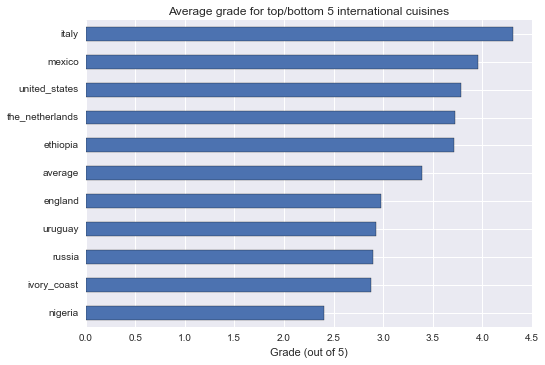

In [17]:
df = data
ave = df.mean().order(ascending = False)
# Dirty trick to remove the respondent ID column
new_ave = ave[1:41]
summary = new_ave.head(5)
mean = pd.Series(new_ave.mean(), index = ['average'])
summary = summary.append(mean)
summary = summary.append(new_ave.tail(5))
summary = summary.order(ascending = True)
summary.plot(kind = 'barh', title = 'Average grade for top/bottom 5 international cuisines').set_xlabel('Grade (out of 5)')

Care must be exercised when analysing these results. Indeed, one needs to make sure that these are statistically sound, especially since certain types of cuisines are less well known than others and therefore few responses were logged. for instance, in the case of Nigerian food, only five people out of 100 rated this cusine, a very poor statistical sample. Similarly, Ivory Coast  Uruguay, Ethiopia and the Netherlands only received 8, 14, 21 and 25 grades. We performed an ANOVA test on the bottom 5 cuisines and found that their average grades are the same, within the statistical uncertainty. In other words, **Nigeria, Ivory Coast, Russia, Uruguay and England all share the honor of being the least liked cuisine in the US**. Things are a bit different at the top. Italy is clearly more liked than Mexican and US cusine (p-value < 0.8%), while Mexico and the US both come second (the difference between their average grades being too small to be statistically meaninful).



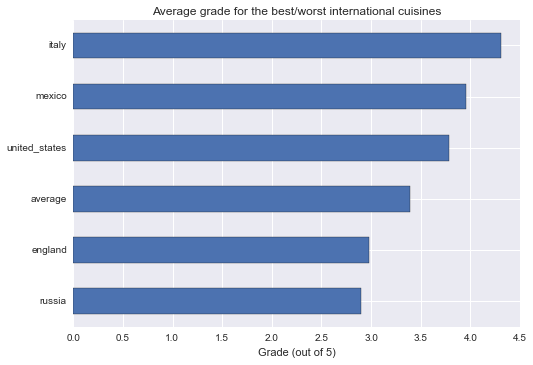

In [18]:
summary.drop(['the_netherlands', 'nigeria', 'ivory_coast', 'uruguay', 'ethiopia']).plot(kind = 'barh', title = 'Average grade for the best/worst international cuisines').set_xlabel('Grade (out of 5)')

Further data analysis can show some other interesting trends. For example, as shown in the figure below, **people with an advanced level of knowledge of international cusines give sistematically larger average grades (3.94) than people with intermediate or novice knowledge levels (3.41 and 3.25, respectively)**. An ANOVA test confirms that this trend is statistically significant (p-value < 0.01%). It could be that a higher knowledge of international cusine leads to an overall higher appreciation of it or, alternatively, that people who are more enthusiastic about food  are also more inclined to try international cuisines. Further data is necessary to explore this question.

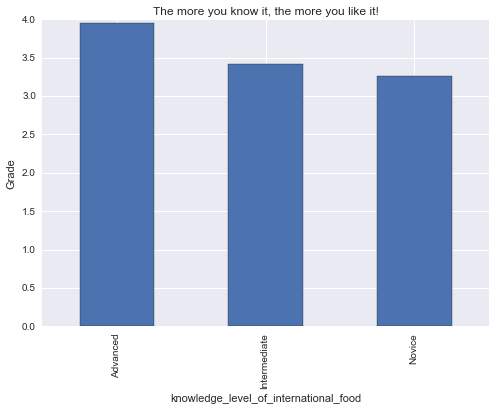

In [27]:
df = data
df = df.groupby(['knowledge_level_of_international_food','gender']).mean()
df = df.unstack(0)
df = df.stack(0)
df1 = df.loc['Male']
df2 = df.loc['Female']
new_df = (df1 + df2)/2
new_df = new_df.drop(('respondent_id'))
new_df.mean().plot(kind = 'bar', title = 'The more you know it, the more you like it!').set_ylabel('Grade')

Finally, we have tried to find any correlation between the knowledge of international food (or interest) with income/education. We did not find any clear trend, probably because of poor statistics. For instance, when one groups the interest in international food by the income level, each category can have as little as 1 or 0 responses. For similar reasons, we could not find any geographical correlation (e.g. do people on the West coast like more certain types of foods?) nor any gender correlation. Interesting, we did find that the number of male respondents (53) was much larger than that of female responders (38), an oddity since in the US there are more women than men (https://en.wikipedia.org/wiki/List_of_countries_by_sex_ratio). This could show that the sample was not properly randomized and could point out to some interesting unconscious gender bias. This is another point that merits further exploration.

## Take home message: what restaurant should I open?

Simply based on the popularity of the international cuisine, one would think that opening Italian, Mexican and US restaurants would be the safest bet. However, it is also resaonable to assume that the market for these cuisines is saturated. Think of Taco Bell, Mc Donald's, Olive Garden, Chipotle, etc. Can you really compete with them? Here we have decided to go after those cuisines that are both highly valued but less popular (meaning that fewer people know about it). For instance, Dutch cuisine came fourth in this survey (see Figure 1) but only 25% of the respondents knew about it. This could make opening a Dutch restaurant a great opportunity, since this cusine is greatly appreciated and  there is significant growth potential (if one could convince the remaining 75% of the US population to try it).

We have therefore developed a new grading system (see details below) that takes into account both the average grade of the cuisine and its growth potential (that is higher the fewer people know this type of cuisine). Below we report the top 5 countries we find in this study. According to our algorithm, **Cameroon, Ghana, Ethiopia, The Netherland and Croatia are the cusines with the most potential.** So if you want to open a restaurant, make sure your serve food from one of the above countries!


In [6]:
df = data
ser = data.count()#[3:43]
ser = ser[3:43]
ave = data.mean()
ave = ave[1:41]
metric = ave * (1-(ser-41)/100)
metric.order(ascending = False).head(5)

cameroon           4.594286
ghana              4.546667
ethiopia           4.457143
the_netherlands    4.315200
croatia            4.300000
dtype: float64

## The nitty-gritty details

The results reported here were tested with inferential statistics techniques. When comparing the mean between two different cusine types, we used a Z-score test. Comparison between multiple means were done using ANOVA.

The algorithm we developed for choosing which restaurants one should open, is as follows:

$$G = g_{ave} * (1-(n-41)/100), $$

where G is the new grade, $g_{ave}$ is the average grade from the survey (e.g. see Figure 1), $n$ is the number of respondents who knew about this specific cuisine and 41 is the average of $n$ over all the types of cusine. One can see that this algorithm strongly penalizes popular cusines (n = 92, 86 and 85 for US, Mexico and Italy, respectively), while it favors those that are less popular (e.g. n = 25 for The Netherlands ). We admit that the choice for this algorithm is rather arbitrary and it is not justified by aparticular theory. People could come with their own version of this algorithm and observe slightly different results.